In [122]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
pd.set_option('display.max_colwidth', None)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [168]:
#loading in the cnbc dataset
cnbc = pd.read_csv("cnbc_headlines.csv")

In [167]:
cnbc.head(5)

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covid-19 vaccine gold rush,17 July 2020,"""Mad Money"" host Jim Cramer recommended buying four companies that are supporting vaccine developers."
1,Cramer's lightning round: I would own Teradyne,17 July 2020,"""Mad Money"" host Jim Cramer rings the lightning round bell, which means he's giving his answers to callers' stock questions at rapid speed."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, even bigger week for vaccines",17 July 2020,"""We'll pay more for the earnings of the non-Covid companies if The Lancet publishes some good news from AstraZeneca's vaccine trial,"" Cramer said."
4,IQ Capital CEO Keith Bliss says tech and healthcare will rally,17 July 2020,"Keith Bliss, IQ Capital CEO, joins ""Closing Bell"" to talk about the broader markets, including the performance of the S&P 500 and the Nasdaq."


In [169]:
#return date only and remove time 
cnbc['Time'] = cnbc['Time'].str.split(',').str[1]

In [170]:
cnbc

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covid-19 vaccine gold rush,17 July 2020,"""Mad Money"" host Jim Cramer recommended buying four companies that are supporting vaccine developers."
1,Cramer's lightning round: I would own Teradyne,17 July 2020,"""Mad Money"" host Jim Cramer rings the lightning round bell, which means he's giving his answers to callers' stock questions at rapid speed."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, even bigger week for vaccines",17 July 2020,"""We'll pay more for the earnings of the non-Covid companies if The Lancet publishes some good news from AstraZeneca's vaccine trial,"" Cramer said."
4,IQ Capital CEO Keith Bliss says tech and healthcare will rally,17 July 2020,"Keith Bliss, IQ Capital CEO, joins ""Closing Bell"" to talk about the broader markets, including the performance of the S&P 500 and the Nasdaq."
...,...,...,...
3075,Markets lack Christmas cheer,26 Dec 2017,"According to Kensho, here's how markets have fared during the week of Christmas over the past five years."
3076,Cramer Remix: The biggest mistake you can make with taxes on your stock market winnings,20 Sept 2018,Jim Cramer revealed his top rule when it comes to taxes and selling stocks.
3077,Cramer says owning too many stocks and too little cash can set you up for failure,22 Dec 2017,"Jim Cramer broke down why owning fewer stocks can help make you more money, and why investors shouldn't be ashamed of having cash on hand."
3078,Cramer: I helped investors through the 2010 flash crash by following one key rule,22 Dec 2017,"Jim Cramer built on his ""nobody ever made a dime panicking"" mantra by explaining how investors can apply it to their portfolios."


In [171]:
#group headlines together by the date they were released 
df_grouped = cnbc.groupby(['Time'],as_index=False)['Headlines'].apply(' '.join)

In [172]:
df_grouped

,Time,Headlines
0,1 April 2019,"Cramer Remix: Fentanyl could derail a US-China trade deal Cramer: Nasdaq, Goldman Sachs, and Amazon are de-risked IPO plays Cramer: The top Q1 performers indicate the market can run higher"
1,1 April 2020,"Calvin Klein-parent PVH CEO on Macy's woes: 'We have a great deal of confidence' in their leadership Calvin Klein-parent PVH CEO discloses COVID-19 diagnosis, says 'I'm fine' Cramer's lightning round: Procter & Gamble has 'unbelievable numbers' Jim Cramer: Investors can 'learn a lot' from first-quarter winners and losers Wall Street must retest lows after 'rude awakening' on coronavirus, Jim Cramer says"
2,1 Aug 2018,Cramer Remix: Why Amazon’s latest quarter was a thing of beauty Cramer's lightning round: Buy some Dropbox stock ahead of its earnings report Cramer finds new ways to play the 'stay-at-home' economy Cramer makes the case for valuing Apple's stock like Procter & Gamble's Cramer points to the market's 'endless buying opportunities' as stocks slide on trade war worries
3,1 Aug 2019,"Cramer Remix: You don't need a roaring economy for this stock to do well Cramer's lightning round: Hold on to Chipotle — It has no China worries Cell tower CEO explains how the 5G rush 'lengthens and strengthens' our growth rate Cramer: New tariffs and forecast cuts are coming — Here's how to play it Fed rate cut, trade wars: How to know if you have too much risk in your portfolio"
4,1 Feb 2018,"Cramer Remix: How you should approach Alphabet’s earnings Cramer's lightning round: S&P Global's stock is 'nothin' but net' With gasoline exports on the rise, refinery CEO sees global demand increasing in 2018 Cramer pinpoints 4 stocks 'on a mission' to higher prices: Boeing, Mastercard, Idexx and Nvidia Cramer tackles Facebook, Apple, Amazon and Alphabet earnings as tech giants report ADP CEO calls Ackman proxy fight 'water under the bridge,' says two have 'professional' relationship"
...,...,...
607,31 March 2020,"People are having 'flashbacks to their childhood' as Chef Boyardee sales tick up, Conagra CEO says Cramer's lightning round: Peloton is the 'ultimate stay-at-home stock' Macy's to be replaced on S&P 500 by Carrier Global Jim Cramer reveals second-quarter playbook, says the quarter is 'going to be so ugly' Palo Alto CEO forgoes salary, commits to 'no COVID-19 layoffs' during pandemic"
608,31 May 2018,"Cramer: We blew it on 3M, but it’s too late to sell Cramer: Steel producer Nucor the biggest winner on Trump tariffs, a ‘gift’ to investors The US is the hottest market for trading, analyst says"
609,31 May 2019,"Cramer Remix: Presume Trump will go through with tariffs on Mexico Cramer's lightning round: Aramark is in the 'penalty box' IBM CEO: AI-driven jobs are coming, and businesses need to prepare a new generation of workers Okta CEO says cloud company has a 'close eye' on tariffs, but for now exposure is minimal Cramer's week ahead: Only game-changing data can counter Trump's surprise tariffs on Mexico"
610,31 Oct 2018,"Cramer Remix: Facebook's not back yet, but it's on its way The stock of Masco managing to soar on weak earnings says a lot about this market: Cramer Cramer's lightning round: Costco's stock 'fits the pattern' of what's OK to buy here A quarter of Wingstop's revenue comes from digital—here's where the CEO sees it going next 'It's a mistake' to write off FANG even as the stocks could still go lower, Cramer says"


In [173]:
#change date to datetime format. 
from dateutil.parser import parse
df_grouped["Time"]
parse = [parse(i) for i in df_grouped["Time"]]
df_grouped["Time"] = parse
df_grouped

,Time,Headlines
0,2019-04-01,"Cramer Remix: Fentanyl could derail a US-China trade deal Cramer: Nasdaq, Goldman Sachs, and Amazon are de-risked IPO plays Cramer: The top Q1 performers indicate the market can run higher"
1,2020-04-01,"Calvin Klein-parent PVH CEO on Macy's woes: 'We have a great deal of confidence' in their leadership Calvin Klein-parent PVH CEO discloses COVID-19 diagnosis, says 'I'm fine' Cramer's lightning round: Procter & Gamble has 'unbelievable numbers' Jim Cramer: Investors can 'learn a lot' from first-quarter winners and losers Wall Street must retest lows after 'rude awakening' on coronavirus, Jim Cramer says"
2,2018-08-01,Cramer Remix: Why Amazon’s latest quarter was a thing of beauty Cramer's lightning round: Buy some Dropbox stock ahead of its earnings report Cramer finds new ways to play the 'stay-at-home' economy Cramer makes the case for valuing Apple's stock like Procter & Gamble's Cramer points to the market's 'endless buying opportunities' as stocks slide on trade war worries
3,2019-08-01,"Cramer Remix: You don't need a roaring economy for this stock to do well Cramer's lightning round: Hold on to Chipotle — It has no China worries Cell tower CEO explains how the 5G rush 'lengthens and strengthens' our growth rate Cramer: New tariffs and forecast cuts are coming — Here's how to play it Fed rate cut, trade wars: How to know if you have too much risk in your portfolio"
4,2018-02-01,"Cramer Remix: How you should approach Alphabet’s earnings Cramer's lightning round: S&P Global's stock is 'nothin' but net' With gasoline exports on the rise, refinery CEO sees global demand increasing in 2018 Cramer pinpoints 4 stocks 'on a mission' to higher prices: Boeing, Mastercard, Idexx and Nvidia Cramer tackles Facebook, Apple, Amazon and Alphabet earnings as tech giants report ADP CEO calls Ackman proxy fight 'water under the bridge,' says two have 'professional' relationship"
...,...,...
607,2020-03-31,"People are having 'flashbacks to their childhood' as Chef Boyardee sales tick up, Conagra CEO says Cramer's lightning round: Peloton is the 'ultimate stay-at-home stock' Macy's to be replaced on S&P 500 by Carrier Global Jim Cramer reveals second-quarter playbook, says the quarter is 'going to be so ugly' Palo Alto CEO forgoes salary, commits to 'no COVID-19 layoffs' during pandemic"
608,2018-05-31,"Cramer: We blew it on 3M, but it’s too late to sell Cramer: Steel producer Nucor the biggest winner on Trump tariffs, a ‘gift’ to investors The US is the hottest market for trading, analyst says"
609,2019-05-31,"Cramer Remix: Presume Trump will go through with tariffs on Mexico Cramer's lightning round: Aramark is in the 'penalty box' IBM CEO: AI-driven jobs are coming, and businesses need to prepare a new generation of workers Okta CEO says cloud company has a 'close eye' on tariffs, but for now exposure is minimal Cramer's week ahead: Only game-changing data can counter Trump's surprise tariffs on Mexico"
610,2018-10-31,"Cramer Remix: Facebook's not back yet, but it's on its way The stock of Masco managing to soar on weak earnings says a lot about this market: Cramer Cramer's lightning round: Costco's stock 'fits the pattern' of what's OK to buy here A quarter of Wingstop's revenue comes from digital—here's where the CEO sees it going next 'It's a mistake' to write off FANG even as the stocks could still go lower, Cramer says"


In [174]:
#lower case all values in headlines
df_grouped["Headlines"] = df_grouped["Headlines"].str.lower()

In [175]:
df_grouped

,Time,Headlines
0,2019-04-01,"cramer remix: fentanyl could derail a us-china trade deal cramer: nasdaq, goldman sachs, and amazon are de-risked ipo plays cramer: the top q1 performers indicate the market can run higher"
1,2020-04-01,"calvin klein-parent pvh ceo on macy's woes: 'we have a great deal of confidence' in their leadership calvin klein-parent pvh ceo discloses covid-19 diagnosis, says 'i'm fine' cramer's lightning round: procter & gamble has 'unbelievable numbers' jim cramer: investors can 'learn a lot' from first-quarter winners and losers wall street must retest lows after 'rude awakening' on coronavirus, jim cramer says"
2,2018-08-01,cramer remix: why amazon’s latest quarter was a thing of beauty cramer's lightning round: buy some dropbox stock ahead of its earnings report cramer finds new ways to play the 'stay-at-home' economy cramer makes the case for valuing apple's stock like procter & gamble's cramer points to the market's 'endless buying opportunities' as stocks slide on trade war worries
3,2019-08-01,"cramer remix: you don't need a roaring economy for this stock to do well cramer's lightning round: hold on to chipotle — it has no china worries cell tower ceo explains how the 5g rush 'lengthens and strengthens' our growth rate cramer: new tariffs and forecast cuts are coming — here's how to play it fed rate cut, trade wars: how to know if you have too much risk in your portfolio"
4,2018-02-01,"cramer remix: how you should approach alphabet’s earnings cramer's lightning round: s&p global's stock is 'nothin' but net' with gasoline exports on the rise, refinery ceo sees global demand increasing in 2018 cramer pinpoints 4 stocks 'on a mission' to higher prices: boeing, mastercard, idexx and nvidia cramer tackles facebook, apple, amazon and alphabet earnings as tech giants report adp ceo calls ackman proxy fight 'water under the bridge,' says two have 'professional' relationship"
...,...,...
607,2020-03-31,"people are having 'flashbacks to their childhood' as chef boyardee sales tick up, conagra ceo says cramer's lightning round: peloton is the 'ultimate stay-at-home stock' macy's to be replaced on s&p 500 by carrier global jim cramer reveals second-quarter playbook, says the quarter is 'going to be so ugly' palo alto ceo forgoes salary, commits to 'no covid-19 layoffs' during pandemic"
608,2018-05-31,"cramer: we blew it on 3m, but it’s too late to sell cramer: steel producer nucor the biggest winner on trump tariffs, a ‘gift’ to investors the us is the hottest market for trading, analyst says"
609,2019-05-31,"cramer remix: presume trump will go through with tariffs on mexico cramer's lightning round: aramark is in the 'penalty box' ibm ceo: ai-driven jobs are coming, and businesses need to prepare a new generation of workers okta ceo says cloud company has a 'close eye' on tariffs, but for now exposure is minimal cramer's week ahead: only game-changing data can counter trump's surprise tariffs on mexico"
610,2018-10-31,"cramer remix: facebook's not back yet, but it's on its way the stock of masco managing to soar on weak earnings says a lot about this market: cramer cramer's lightning round: costco's stock 'fits the pattern' of what's ok to buy here a quarter of wingstop's revenue comes from digital—here's where the ceo sees it going next 'it's a mistake' to write off fang even as the stocks could still go lower, cramer says"


In [176]:
#clean headlines
headlines = [BeautifulSoup(df_grouped["Headlines"][i]) for i in range(len(df_grouped["Headlines"]))]
headlines_cleaned = [headlines[i].get_text().replace("\t", " ").replace("\r", " ").replace("\n", " ") for i in range(len(headlines))]

In [133]:
df_grouped["Headlines"]= headlines_cleaned

In [134]:
df_grouped

,Time,Headlines
0,2019-04-01,"cramer remix: fentanyl could derail a us-china trade deal cramer: nasdaq, goldman sachs, and amazon are de-risked ipo plays cramer: the top q1 performers indicate the market can run higher"
1,2020-04-01,"calvin klein-parent pvh ceo on macy's woes: 'we have a great deal of confidence' in their leadership calvin klein-parent pvh ceo discloses covid-19 diagnosis, says 'i'm fine' cramer's lightning round: procter & gamble has 'unbelievable numbers' jim cramer: investors can 'learn a lot' from first-quarter winners and losers wall street must retest lows after 'rude awakening' on coronavirus, jim cramer says"
2,2018-08-01,cramer remix: why amazon’s latest quarter was a thing of beauty cramer's lightning round: buy some dropbox stock ahead of its earnings report cramer finds new ways to play the 'stay-at-home' economy cramer makes the case for valuing apple's stock like procter & gamble's cramer points to the market's 'endless buying opportunities' as stocks slide on trade war worries
3,2019-08-01,"cramer remix: you don't need a roaring economy for this stock to do well cramer's lightning round: hold on to chipotle — it has no china worries cell tower ceo explains how the 5g rush 'lengthens and strengthens' our growth rate cramer: new tariffs and forecast cuts are coming — here's how to play it fed rate cut, trade wars: how to know if you have too much risk in your portfolio"
4,2018-02-01,"cramer remix: how you should approach alphabet’s earnings cramer's lightning round: s&p global's stock is 'nothin' but net' with gasoline exports on the rise, refinery ceo sees global demand increasing in 2018 cramer pinpoints 4 stocks 'on a mission' to higher prices: boeing, mastercard, idexx and nvidia cramer tackles facebook, apple, amazon and alphabet earnings as tech giants report adp ceo calls ackman proxy fight 'water under the bridge,' says two have 'professional' relationship"
...,...,...
607,2020-03-31,"people are having 'flashbacks to their childhood' as chef boyardee sales tick up, conagra ceo says cramer's lightning round: peloton is the 'ultimate stay-at-home stock' macy's to be replaced on s&p 500 by carrier global jim cramer reveals second-quarter playbook, says the quarter is 'going to be so ugly' palo alto ceo forgoes salary, commits to 'no covid-19 layoffs' during pandemic"
608,2018-05-31,"cramer: we blew it on 3m, but it’s too late to sell cramer: steel producer nucor the biggest winner on trump tariffs, a ‘gift’ to investors the us is the hottest market for trading, analyst says"
609,2019-05-31,"cramer remix: presume trump will go through with tariffs on mexico cramer's lightning round: aramark is in the 'penalty box' ibm ceo: ai-driven jobs are coming, and businesses need to prepare a new generation of workers okta ceo says cloud company has a 'close eye' on tariffs, but for now exposure is minimal cramer's week ahead: only game-changing data can counter trump's surprise tariffs on mexico"
610,2018-10-31,"cramer remix: facebook's not back yet, but it's on its way the stock of masco managing to soar on weak earnings says a lot about this market: cramer cramer's lightning round: costco's stock 'fits the pattern' of what's ok to buy here a quarter of wingstop's revenue comes from digital—here's where the ceo sees it going next 'it's a mistake' to write off fang even as the stocks could still go lower, cramer says"


In [177]:
#get stock data for the dates that we have news headlines
import yfinance as yf
# Request historical data for past 5 years
data = yf.Ticker("SPY").history(period='5y')
start = "2017-12-21"
end = "2020-07-17"
data=data.reset_index()
data_cleaned=data.loc[(data['Date'] >= start) & (data['Date'] <= end)]
data_cleaned
change= data_cleaned["Close"]-data_cleaned["Close"].shift(1)
data_cleaned["Change"]=change
data_cleaned = data_cleaned[1:]
data_cleaned
market_data = data_cleaned[data_cleaned["Date"].isin(df_grouped["Time"])]
market_data
df_grouped = df_grouped[df_grouped["Time"].isin(market_data["Date"])]
df_grouped

<ipython-input-177-d4b23d24de7b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Change"]=change


,Time,Headlines
0,2019-04-01,"cramer remix: fentanyl could derail a us-china trade deal cramer: nasdaq, goldman sachs, and amazon are de-risked ipo plays cramer: the top q1 performers indicate the market can run higher"
1,2020-04-01,"calvin klein-parent pvh ceo on macy's woes: 'we have a great deal of confidence' in their leadership calvin klein-parent pvh ceo discloses covid-19 diagnosis, says 'i'm fine' cramer's lightning round: procter & gamble has 'unbelievable numbers' jim cramer: investors can 'learn a lot' from first-quarter winners and losers wall street must retest lows after 'rude awakening' on coronavirus, jim cramer says"
2,2018-08-01,cramer remix: why amazon’s latest quarter was a thing of beauty cramer's lightning round: buy some dropbox stock ahead of its earnings report cramer finds new ways to play the 'stay-at-home' economy cramer makes the case for valuing apple's stock like procter & gamble's cramer points to the market's 'endless buying opportunities' as stocks slide on trade war worries
3,2019-08-01,"cramer remix: you don't need a roaring economy for this stock to do well cramer's lightning round: hold on to chipotle — it has no china worries cell tower ceo explains how the 5g rush 'lengthens and strengthens' our growth rate cramer: new tariffs and forecast cuts are coming — here's how to play it fed rate cut, trade wars: how to know if you have too much risk in your portfolio"
4,2018-02-01,"cramer remix: how you should approach alphabet’s earnings cramer's lightning round: s&p global's stock is 'nothin' but net' with gasoline exports on the rise, refinery ceo sees global demand increasing in 2018 cramer pinpoints 4 stocks 'on a mission' to higher prices: boeing, mastercard, idexx and nvidia cramer tackles facebook, apple, amazon and alphabet earnings as tech giants report adp ceo calls ackman proxy fight 'water under the bridge,' says two have 'professional' relationship"
...,...,...
607,2020-03-31,"people are having 'flashbacks to their childhood' as chef boyardee sales tick up, conagra ceo says cramer's lightning round: peloton is the 'ultimate stay-at-home stock' macy's to be replaced on s&p 500 by carrier global jim cramer reveals second-quarter playbook, says the quarter is 'going to be so ugly' palo alto ceo forgoes salary, commits to 'no covid-19 layoffs' during pandemic"
608,2018-05-31,"cramer: we blew it on 3m, but it’s too late to sell cramer: steel producer nucor the biggest winner on trump tariffs, a ‘gift’ to investors the us is the hottest market for trading, analyst says"
609,2019-05-31,"cramer remix: presume trump will go through with tariffs on mexico cramer's lightning round: aramark is in the 'penalty box' ibm ceo: ai-driven jobs are coming, and businesses need to prepare a new generation of workers okta ceo says cloud company has a 'close eye' on tariffs, but for now exposure is minimal cramer's week ahead: only game-changing data can counter trump's surprise tariffs on mexico"
610,2018-10-31,"cramer remix: facebook's not back yet, but it's on its way the stock of masco managing to soar on weak earnings says a lot about this market: cramer cramer's lightning round: costco's stock 'fits the pattern' of what's ok to buy here a quarter of wingstop's revenue comes from digital—here's where the ceo sees it going next 'it's a mistake' to write off fang even as the stocks could still go lower, cramer says"


In [178]:
#functions added to further clean data by removing punctuation and numbers 
from string import punctuation

def remove_punctuation(document):

    no_punct = ''.join([character for character in document if character not in punctuation])
    
    return no_punct

def remove_digit(document): 
    
    no_digit = ''.join([character for character in document if not character.isdigit()])
              
    return no_digit

In [179]:
#remove punctuations and numbers
df_grouped["Headlines"] = df_grouped["Headlines"].apply(remove_punctuation).apply(remove_digit)

<ipython-input-179-10c7ab7b1e1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped["Headlines"] = df_grouped["Headlines"].apply(remove_punctuation).apply(remove_digit)


In [180]:
#sort dates in order
df_grouped = df_grouped.sort_values(by='Time', ascending=True)

In [181]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
def remove_stopwords(document):
    
    words = [word for word in document if not word in stop_words]
    
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def stemmer(document):
    
    stemmed_document = [porter.stem(word) for word in document]
    
    return stemmed_document

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ialsosellrice/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [182]:
text_tokenized = df_grouped["Headlines"].apply(word_tokenize)

In [183]:
text_tokenized_stem = text_tokenized.apply(stemmer)

In [184]:
text_detokenized = text_tokenized_stem.apply(TreebankWordDetokenizer().detokenize)

In [185]:
from sklearn.feature_extraction.text import CountVectorizer

countvec1 = CountVectorizer(min_df = 0.01)
sparse_dtm1 = countvec1.fit_transform(text_detokenized)

In [186]:
dtm1 = pd.DataFrame(sparse_dtm1.toarray(), columns=countvec1.get_feature_names(), index=df_grouped.index)
dtm1

,about,accord,acquisit,act,action,adob,advantag,advertis,advis,after,...,worst,worth,would,wouldnt,wrong,year,yet,yield,you,your
445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
535,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
25,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
328,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [187]:
#add a column to mark whether the market closed in the green or not 
market_data['Green'] = [1 if i >= 0 else 0 for i in market_data["Change"]]

<ipython-input-187-fc0cf0c32597>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Green'] = [1 if i >= 0 else 0 for i in market_data["Change"]]


In [146]:

market_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Change,Green
261,2017-12-22,250.555562,250.593023,249.900137,250.471298,78720900,0.0,0,-0.065506,0
262,2017-12-26,250.040550,250.405723,249.890766,250.171646,45244400,0.0,0,-0.299652,0
263,2017-12-27,250.349557,250.677270,250.003128,250.293381,57751000,0.0,0,0.121735,1
266,2018-01-02,250.780213,251.688431,250.368236,251.650970,86655700,0.0,0,1.788300,1
267,2018-01-03,251.828905,253.401921,251.828905,253.242737,90070400,0.0,0,1.591766,1
...,...,...,...,...,...,...,...,...,...,...
901,2020-07-13,314.424487,316.958492,308.531422,309.228760,102997500,0.0,0,-2.700989,0
902,2020-07-14,307.716221,314.061110,306.439402,313.236084,93657000,0.0,0,4.007324,1
903,2020-07-15,316.663848,317.282624,313.579796,316.113831,87196500,0.0,0,2.877747,1
904,2020-07-16,314.090546,315.553981,313.403010,315.072723,54622500,0.0,0,-1.041107,0


In [188]:
#split data with a 70-30 split for train-test
y_train = market_data["Green"].iloc[:414]
y_test = market_data["Green"].iloc[414:]
X_train = dtm1.iloc[:414]
X_test = dtm1.iloc[414:]

In [ ]:
avg_green_close = sum(market_data[market_data["Change"]>0]["Change"])/333
avg_red_close = sum(market_data[market_data["Change"]<0]["Change"])/(592-333)

In [224]:
## using GridSearchCV to find best max_features:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
import time

grid_values = {'max_features': np.linspace(1,15,15, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

tic = time.time()

rf2 = RandomForestClassifier() 
# Note: here we set verbose=2 to keep track of the progress (the running time) of the cross validation. 
cv = KFold(n_splits=5,random_state=333,shuffle=True) 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='accuracy', cv=cv,verbose=2)
rf_cv.fit(X_train, y_train)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.6s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.6s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.6s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.6s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.6s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.6s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.6s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.5s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.5s
[CV] END max_features=2, min_samples_leaf=5, n_e

GridSearchCV(cv=KFold(n_splits=5, random_state=333, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='accuracy', verbose=2)

time: 45.7 s


(0.3, 0.6)

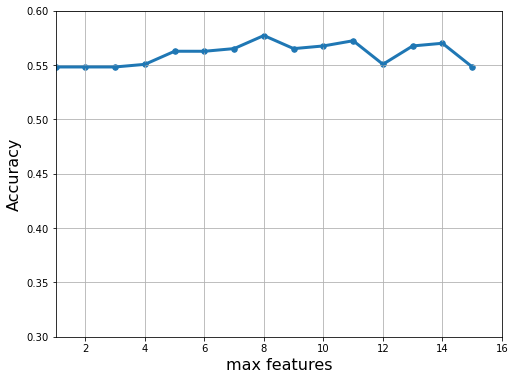

In [225]:
toc = time.time()

print('time:', round(toc-tic, 2),'s')
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 16])
plt.ylim([0.3, .6])

In [228]:
#random forest classifier using best max features based on cross validation above
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [258]:
#confusion matrix and accuracy for Random Forest
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, rf_pred)
print ("Confusion Matrix: \n", cm)
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)
print ("\nAccuracy:", accuracy_score(y_test, rf_pred))
print ("Random Forest Expected Gain:", cm.ravel()[3]*avg_green_close - cm.ravel()[0]*avg_red_close + cm.ravel()[1]*avg_red_close - cm.ravel()[2]*avg_green_close)

Confusion Matrix: 
 [[  7  63]
 [  3 105]]
TPR is: 0.9722
FPR is: 0.9000

Accuracy: 0.6292134831460674
Random Forest Expected Gain: 81.98996741492469


In [259]:
#logistic regression classifier and confusion matrix with accuracy
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=88)
logreg.fit(X_train, y_train)
log_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, log_pred)
print ("Confusion Matrix: \n", cm)
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)
print ("\nAccuracy:", accuracy_score(y_test, log_pred))
print ("Logistic Regression Expected Gain:", cm.ravel()[3]*avg_green_close - cm.ravel()[0]*avg_red_close + cm.ravel()[1]*avg_red_close - cm.ravel()[2]*avg_green_close)

Confusion Matrix: 
 [[38 32]
 [47 61]]
TPR is: 0.5648
FPR is: 0.4571

Accuracy: 0.5561797752808989
Logistic Regression Expected Gain: 48.23510905838174


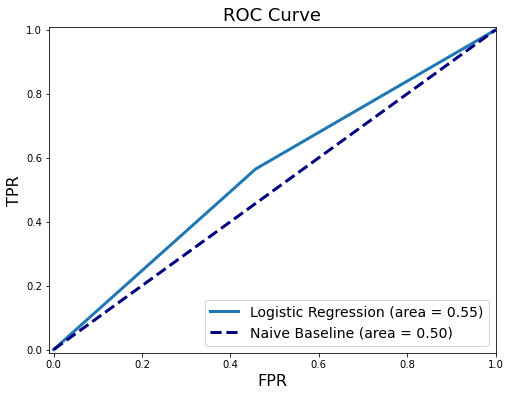

In [209]:
#ROC curve for logistic regression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, logreg.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

In [210]:
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingRegressor(n_estimators=2000, learning_rate= 0.001, max_leaf_nodes=3,
                                max_depth=10, min_samples_leaf=10, random_state=88, verbose=1) 
gbr.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.2476           10.90s
         2           0.2476           10.79s
         3           0.2476           10.28s
         4           0.2476           10.06s
         5           0.2475           12.06s
         6           0.2475           12.51s
         7           0.2475           12.22s
         8           0.2475           11.93s
         9           0.2475           11.95s
        10           0.2474           11.82s
        20           0.2472           10.09s
        30           0.2469            9.43s
        40           0.2467            9.63s
        50           0.2464            9.65s
        60           0.2462            9.44s
        70           0.2460            9.15s
        80           0.2457            8.93s
        90           0.2455            8.74s
       100           0.2453            8.59s
       200           0.2432            8.09s
       300           0.2413            8.15s
       40

GradientBoostingRegressor(learning_rate=0.001, max_depth=10, max_leaf_nodes=3,
                          min_samples_leaf=10, n_estimators=2000,
                          random_state=88, verbose=1)

In [261]:
#gradient boosting confusion matrix and accuracy
y_prob_gbr = gbr.predict(X_test)
gbr_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob_gbr])

cm = confusion_matrix(y_test, gbr_pred)
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, gbr_pred))
print ("Gradient Boosting Expected Gain:", cm.ravel()[3]*avg_green_close - cm.ravel()[0]*avg_red_close + cm.ravel()[1]*avg_red_close - cm.ravel()[2]*avg_green_close)

TPR is: 0.8056
FPR is: 0.7714
Confusion Matrix: 
 [[16 54]
 [21 87]]

Accuracy: 0.5786516853932584
Gradient Boosting Expected Gain: 48.28393275826751


In [264]:
#baseline accuracy by assuming the stock market will always close green
print(sum(y_test==1)/len(y_test))
print("Baselines Model Expected Gain:", (.6*2.287 - .4*2.7)*(592-414))

0.6067415730337079
Baselines Model Expected Gain: 52.011599999999966


In [262]:
#linear discriminant analysis with confusion matrix and accuracy
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)
cm = confusion_matrix(y_test, lda_pred)
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, lda_pred))
print ("LDA Expected Gain:", cm.ravel()[3]*avg_green_close - cm.ravel()[0]*avg_red_close + cm.ravel()[1]*avg_red_close - cm.ravel()[2]*avg_green_close)

TPR is: 0.5185
FPR is: 0.4143
Confusion Matrix: 
 [[41 29]
 [52 56]]

Accuracy: 0.5449438202247191
LDA Expected Gain: 41.57441447620894


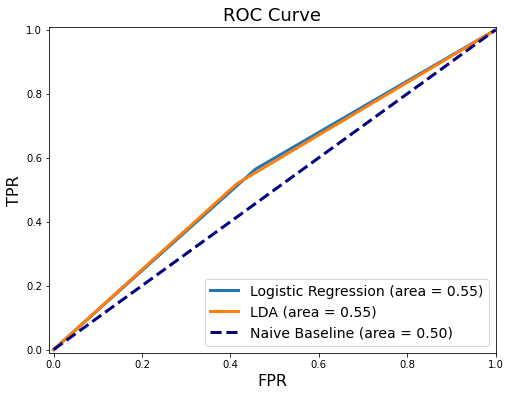

In [199]:
fpr_lda, tpr_lda, _ = roc_curve(y_test,lda_pred)
roc_auc_lda = auc(fpr_lda, tpr_lda)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot(fpr_lda, tpr_lda, lw=3, label='LDA (area = {:0.2f})'.format(roc_auc_lda))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

In [205]:
# cross validation for cart to find best ccp_alpha
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.1, 10)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=4).fit(X_train, y_train)

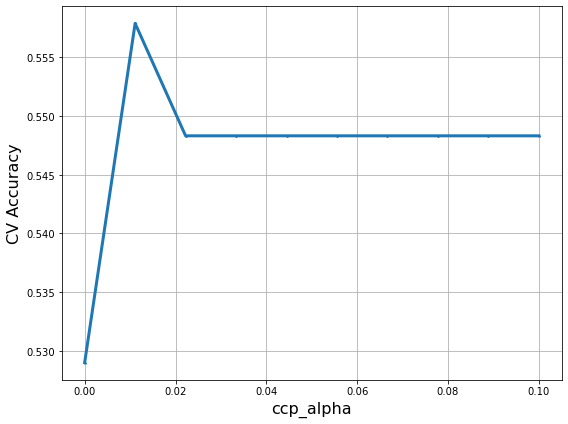

Best ccp_alpha {'ccp_alpha': 0.011111111111111112}


In [206]:
#plotting accuracy vs ccp alpha
import matplotlib.pyplot as plt
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

Node count = 7


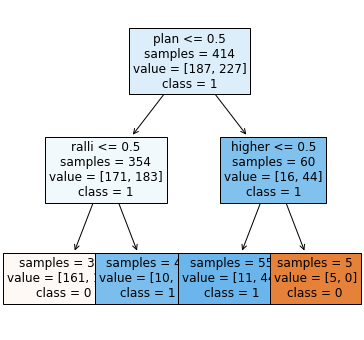

In [202]:
from sklearn.tree import plot_tree

print('Node count =', dtc_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(6,6))
plot_tree(dtc_cv.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          fontsize=12) 
plt.show()

In [263]:
#confusion matrix and accuracy for CART
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

tree_pred = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test, tree_pred)
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, tree_pred))
print ("CART Expected Gain:", cm.ravel()[3]*avg_green_close - cm.ravel()[0]*avg_red_close + cm.ravel()[1]*avg_red_close - cm.ravel()[2]*avg_green_close)

TPR is: 0.2315
FPR is: 0.0571
Confusion Matrix: 
 [[66  4]
 [83 25]]

Accuracy: 0.5112359550561798
CART Expected Gain: 34.86489619415033
